**Install packages**

In [98]:
!pip install firebase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Setup Firebase connection**

In [99]:
from firebase import firebase

# Firebase connection setup
FBconn = firebase.FirebaseApplication('https://cloudtirgul5-default-rtdb.firebaseio.com/', None)

**Main Menu**

In [100]:
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets

# Function to display the main menu
def display_main_menu():
    clear_output(wait=True)
    
    # Title and subtitle
    display(HTML("<h1 style='text-align: center; font-size: 50px;'>Welcome to Cloud Battleship Trivia</h1>"))
    display(HTML("<img src='https://staticctf.ubisoft.com/J3yJr34U2pZ2Ieem48Dwy9uqj5PNUQTn/5UCI3AbvqSJ8QCnNKdGFfs/7ba3a4d1ef931142b5546bb2c13d26d1/-BS-_Feature_-_4.jpg' style='display: block; margin-left: auto; margin-right: auto; width: 35%;'>"))
    display(HTML("<h1> </h1>"))

    # Button style
    button_style = widgets.ButtonStyle(
        button_color="lightblue",
        font_weight="bold",
        border_radius="12px"
    )
    
    # Create buttons
    add_question_button = widgets.Button(description="Add Question", style=button_style, layout=widgets.Layout(width="200px"))
    start_game_button = widgets.Button(description="Start Game", style=button_style, layout=widgets.Layout(width="200px"))
    rules_button = widgets.Button(description="Rules", style=button_style, layout=widgets.Layout(width="200px"))
    
    
    # Display buttons
    display(widgets.HBox([add_question_button, start_game_button, rules_button], layout=widgets.Layout(justify_content="center")))

    # Add button click event handlers
    # (Can replace these with the appropriate functions for each button)
    add_question_button.on_click(lambda _: display_admin_login())
    start_game_button.on_click(lambda _: display_ship_placement())
    rules_button.on_click(lambda _: display_rules())

**Rules**

In [101]:
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets

def display_rules():
    clear_output(wait=True)
    
    rules_html = '''
    <div style='text-align: center;'>
        <h1>Game Rules</h1>
        <div style='text-align: justify; max-width: 80%; margin-left: 500px; margin-right: auto; font-size: 1.1em; font-weight: bold; line-height: 1.5em;'>
            <ol>
                <li>Start the game and answer the trivia questions.</li>
                <li>If you answer correctly, you will be allowed to attack the opponent's battleship grid.</li>
                <li>If you answer incorrectly, the computer will take its turn and attack your battleship grid.</li>
                <li>Continue answering questions and attacking the opponent's grid until one player's ships are all sunk.</li>
                <li>The player with remaining ships wins the game.</li>
            </ol>
        </div>
    </div>
    '''
    display(HTML(rules_html))
    
    back_button = widgets.Button(description="Back", button_style='info', layout=widgets.Layout(width='auto'))
    display(HTML("<div style='text-align: center;'>"))
    display(back_button)
    display(HTML("</div>"))

    def on_back_click(button):
        display_main_menu()

    back_button.on_click(on_back_click)

**Admin**

In [102]:
def display_admin_login():
    clear_output(wait=True)
    
    display(HTML("<h2 style='text-align: center;'>Admin Login</h2>"))
    display(HTML("<h3 style='text-align: left;'>Enter the admin password:</h3>"))

    password_input = widgets.Password(description="Password", layout=widgets.Layout(width='300px'))
    submit_button = widgets.Button(description="Submit", button_style='success', layout=widgets.Layout(width='200px'))
    back_button = widgets.Button(description="Back", button_style='danger', layout=widgets.Layout(width='200px'))

    display(password_input)
    display(widgets.HBox([submit_button, back_button], layout=widgets.Layout(justify_content="center", margin="15px")))

    def on_submit_click(button):
        admin_password = str(FBconn.get('/admin', 'password'))
        if password_input.value == admin_password:
            admin_input()
        else:
            print("Incorrect password. Try again.")

    def on_back_click(button):
        display_main_menu()

    submit_button.on_click(on_submit_click)
    back_button.on_click(on_back_click)

In [103]:
def admin_input():
    clear_output(wait=True)
    
    display(HTML("<h3 style='text-align: center;'>Enter the question and answers:</h3>"))
    question_input = widgets.Text(description="Question", layout=widgets.Layout(width="80%"))
    answer_inputs = [widgets.Text(description=f"Option {i + 1}", layout=widgets.Layout(width="80%")) for i in range(4)]
    correct_dropdown = widgets.Dropdown(options=[1, 2, 3, 4], description="Correct", layout=widgets.Layout(width="80%"))
    submit_button = widgets.Button(description="Submit", button_style='success', layout=widgets.Layout(width="10%", margin="10px"))
    cancel_button = widgets.Button(description="Cancel", button_style='danger', layout=widgets.Layout(width="10%", margin="10px"))
    
    display(question_input)
    for answer_input in answer_inputs:
        display(answer_input)
    display(correct_dropdown)
    
    button_container = widgets.VBox([submit_button, cancel_button], layout=widgets.Layout(align_items="center"))
    display(button_container)

    def on_submit_click(button):
        question = question_input.value
        answers = [answer_input.value for answer_input in answer_inputs]
        
        if "" in answers or question == "":
            display(HTML("<p style='color: red; text-align: center;'>Please fill in all fields.</p>"))
            return

        correct = correct_dropdown.value
        add_question(question, correct, *answers)
        display_main_menu()

    def on_cancel_click(button):
        display_main_menu()

    submit_button.on_click(on_submit_click)
    cancel_button.on_click(on_cancel_click)

In [104]:
# This function used to add a question to the database
def add_question(question, correct, *answers):
    question_data = {
        "Question": question,
        "Option1": answers[0],
        "Option2": answers[1],
        "Option3": answers[2],
        "Option4": answers[3],
        "Correct": correct
    }
    FBconn.post('/questions', question_data)

**Start Game**

In [105]:
from ipywidgets.widgets.widget_style import Style
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets
import time

def display_title_and_instructions():
    title = widgets.HTML("<h1 style='text-align: center;'>Place Your Ships</h1>")
    instructions = widgets.HTML("<h3 style='text-align: center;'>Click on a ship and then click on the grid to place it.</h3>")
    display(widgets.VBox([title, instructions]))
    return title, instructions

def create_grid_buttons(computer_board, user_board):
    grid_buttons = []
    for i in range(10):
        row = []
        for j in range(10):
            button = widgets.Button(
                layout=widgets.Layout(width='50px', height='50px'),
                style=widgets.ButtonStyle(button_color='lightblue')
            )
            button.row, button.col = i, j
            button.on_click(lambda button, computer_board=computer_board: on_attack_click(computer_board, button, grid_buttons, user_board))
            row.append(button)
        grid_buttons.append(row)
    return grid_buttons

def create_grid_buttons_start():
    grid_buttons = [
        [widgets.Button(description="",style=widgets.ButtonStyle(button_color='lightblue'), layout=widgets.Layout(width="50px", height="50px"), 
                        _dom_classes=["grid-button"]) for _ in range(10)]
        for _ in range(10)
    ]
    return grid_buttons

def create_ship_buttons(ship_list):
    # Button style
    button_style = widgets.ButtonStyle(
        button_color="lightblue",
        font_weight="bold",
        border_radius="12px"
    )

    ship_buttons = [
        widgets.Button(description=f"{ship['name']} ({ship['size']})",style=button_style, layout=widgets.Layout(width="180px"))
        for ship in ship_list
    ]
    return ship_buttons

def create_grid_and_ships_layout(grid_buttons, ship_buttons, title, instructions, orientation_button, progress_bar, error_msg, start_game_button):
    grid_box = widgets.GridBox(
        [button for row in grid_buttons for button in row],
        layout=widgets.Layout(grid_template_columns="repeat(10, 50px)")
    )

    start_game_button.layout.visibility = 'hidden'
    display(widgets.VBox([
        widgets.HBox([
            widgets.VBox(ship_buttons + [widgets.Box(layout=widgets.Layout(height="15px")), orientation_button, progress_bar, error_msg, start_game_button]),
            grid_box
            ], layout=widgets.Layout(justify_content="space-around", width="70%")),
    ]))


def display_ship_placement():
    clear_output(wait=True)
    title, instructions = display_title_and_instructions()
    display(HTML("""
    <style>
        .grid-button {
            border: 1px solid black;
            width: 50px !important;
            height: 50px !important;
            padding: 0 !important;
        }
    </style>
    """))

    ship_list = [
        {"name": "Carrier", "size": 5},
        {"name": "Battleship", "size": 4},
        {"name": "Cruiser", "size": 3},
        {"name": "Submarine", "size": 3},
        {"name": "Destroyer", "size": 2},
    ]

    grid_buttons = create_grid_buttons_start()
    ship_buttons = create_ship_buttons(ship_list)
    
    # Create Start Game button
    start_game_button = widgets.Button(description="Start Game", button_style='success', layout=widgets.Layout(width='180px'))
    
    selected_ship = None
    ship_orientation = 'horizontal'
    placed_ships = set()

    def on_ship_button_click(button):
        nonlocal selected_ship
        if button.description not in placed_ships:
            selected_ship = button.description

    for button in ship_buttons:
        button.on_click(on_ship_button_click)

    def on_grid_button_click(button):
        nonlocal selected_ship, ship_orientation, placed_ships

        if not selected_ship:
            error_msg.value = '<p style="color: red; font-weight: bold; font-size: 20px;">Please select a ship first.</p>'
            return

        row, col = None, None
        for r, button_row in enumerate(grid_buttons):
            for c, b in enumerate(button_row):
                if b is button:
                    row, col = r, c
                    break

        ship_name, ship_size = selected_ship.split()[:2]
        ship_size = int(ship_size[1:-1])

        if ship_orientation == 'horizontal':
            if col + ship_size > 10:
                error_msg.value = '<p style="color: red; font-weight: bold; font-size: 20px;">Ship does not fit horizontally. Try another position.</p>'
                return

            for i in range(ship_size):
                if grid_buttons[row][col + i].description != "":
                    error_msg.value = '<p style="color: red; font-weight: bold; font-size: 20px;">There is already a ship in the way. Try another position.</p>'
                    return

            for i in range(ship_size):
                grid_buttons[row][col + i].description = "S"

        else:
            if row + ship_size > 10:
                error_msg.value = '<p style="color: red; font-weight: bold; font-size: 20px;">Ship does not fit vertically. Try another position.</p>'
                return

            for i in range(ship_size):
                if grid_buttons[row + i][col].description != "":
                    error_msg.value = '<p style="color: red; font-weight: bold; font-size: 20px;">There is already a ship in the way. Try another position.</p>'
                    return

            for i in range(ship_size):
                grid_buttons[row + i][col].description = "S"
      
        placed_ships.add(selected_ship)
        # After placed the ship disable it
        for button in ship_buttons:
          if button.description == selected_ship:
            button.disabled= True

        selected_ship = None
        progress_bar.value += 1
        # Check if all ships have been placed
        if progress_bar.value == len(ship_list):
            # Generate the computer's board
            computer_board = generate_computer_ships(ship_list)
            # Proceed to the next phase of the game
        error_msg.value = ""

        if progress_bar.value == len(ship_list):
            error_msg.value = '<p style="color: green; font-weight: bold; font-size: 20px;">All ships placed. You are ready to start the game!</p>'
            start_game_button.layout.visibility = 'visible'
            user_board = [[button.description for button in button_row] for button_row in grid_buttons]
            start_game_button.on_click(lambda _: start_game(user_board, computer_board))

    for row in grid_buttons:
        for button in row:
            button.on_click(on_grid_button_click)

    orientation_button = widgets.ToggleButtons(
        options=['horizontal', 'vertical'],
        description='Orientation:',
        disabled=False,
        button_style='',
    )

    def on_orientation_change(change):
        nonlocal ship_orientation
        ship_orientation = change['new']

    orientation_button.observe(on_orientation_change, names='value')

    progress_bar = widgets.FloatProgress(value=0, min=0, max=len(ship_list), description='Progress:')

    error_msg = widgets.HTML(value='')

    create_grid_and_ships_layout(grid_buttons, ship_buttons, title, instructions, orientation_button, progress_bar, error_msg, start_game_button)

In [106]:
import random

def generate_computer_ships(ship_list):
    computer_board = [['' for _ in range(10)] for _ in range(10)]
    for ship in ship_list:
        ship_placed = False
        while not ship_placed:
            row = random.randint(0, 9)
            col = random.randint(0, 9)
            orientation = random.choice(['horizontal', 'vertical'])

            if can_place_ship(computer_board, row, col, ship['size'], orientation):
                if orientation == 'horizontal':
                    for i in range(ship['size']):
                        computer_board[row][col + i] = "S"
                else:
                    for i in range(ship['size']):
                        computer_board[row + i][col] = "S"
                ship_placed = True
    return computer_board


def can_place_ship(board, row, col, ship_size, orientation):
    if orientation == 'horizontal':
        if col + ship_size > 10:
            return False
        for i in range(ship_size):
            if board[row][col + i] != '':
                return False
    else:
        if row + ship_size > 10:
            return False
        for i in range(ship_size):
            if board[row + i][col] != '':
                return False
    return True


In [107]:
def get_random_question():
    questions = FBconn.get('/questions', None)
    question_keys = list(questions.keys())
    random_key = random.choice(question_keys)
    return questions[random_key], random_key

In [108]:
def display_user_grid(user_board):
    grid_buttons = [
        [
            widgets.Button(
                description=cell if cell != "" else " ",
                layout=widgets.Layout(width="50px", height="50px"),
                disabled=True,
            )
            for cell in row
        ]
        for row in user_board
    ]

    grid_box = widgets.GridBox(
        [button for row in grid_buttons for button in row],
        layout=widgets.Layout(grid_template_columns="repeat(10, 50px)")
    )

    display(grid_box)


In [109]:
def display_trivia_question(question_data, grid_buttons, user_board):
    clear_output(wait=True)
    # Title
    display(HTML("<h1 style='text-align: center;'>Cloud Battleship Trivia</h1>"))
  
    question_text = widgets.HTML(value="<h2 style='text-align: center;'>" + question_data['Question'] + "</h2>")
    
     # Button style
    button_style = widgets.ButtonStyle(
        button_color="lightblue",
        font_weight="bold",
        border_radius="12px"
    )

    answer_buttons = [
        widgets.Button(description=question_data[f"Option{i+1}"],button_style='info', layout=widgets.Layout(width="700px"))
        for i in range(4)
    ]
    
    for button in answer_buttons:
        button.on_click(lambda button_instance: on_answer_click(button_instance, question_data, grid_buttons, answer_buttons, user_board))

    answer_box = widgets.VBox([answer_buttons[0], answer_buttons[1],answer_buttons[2], answer_buttons[3]
    ], layout=widgets.Layout(justify_content='center'))
    
    question_box = widgets.VBox([question_text, answer_box, computer_attacking_label], layout=widgets.Layout(align_items='center', margin='0 0 20px 0'))
    display(question_box)
    return question_box

In [122]:
def on_answer_click(button, question_data, grid_buttons, answer_buttons, user_board):
    correct_answer = question_data['Option' + str(question_data['Correct'])]
    global correct_answers, incorrect_answers
    
    # Disable all answer buttons to prevent multiple answers.
    for b in answer_buttons:
        b.disabled = True

    if button.description == correct_answer:
        correct_answers = correct_answers + 1
        button.button_style = 'success'
        computer_attacking_label.value='<p style="color: green; font-weight: bold; font-size: 20px;">You can attack!</p>'
        enable_grid_buttons(grid_buttons)

    else:
        incorrect_answers = incorrect_answers + 1
        button.button_style = 'danger'
        computer_attacking_label.value='<p style="color: red; font-weight: bold; font-size: 20px;">Computer is attacking!... Please wait</p>'
        time.sleep(2.5)
        disable_grid_buttons(grid_buttons)
        computer_attack(user_board)

        if is_game_over(user_board):
          computer_attacking_label.value='<p style="color: blue; font-weight: bold; font-size: 20px;">You have been destroyed! You lost!</p>'
          time.sleep(2)
          computer_attacking_label.value=''
          display_end_game()
          return
        else:
          clear_output(wait=True)
        
        computer_attacking_label.value='<p style="color: red; font-weight: bold; font-size: 20px;">Get ready for the next question</p>'
        time.sleep(2.5)
        computer_attacking_label.value =""
        new_question_data, _ = get_random_question()
        display_trivia_question(new_question_data, grid_buttons, user_board)
        display_attack_grid(grid_buttons)


In [111]:
def on_attack_click(computer_board, button, grid_buttons, user_board):
    button_row, button_col = button.row, button.col
    question_data, _ = get_random_question()
    if computer_board[button_row][button_col] == 'S':
        button.description = 'X'
        computer_board[button_row][button_col] = 'X'
        computer_attacking_label.value='<p style="color: green; font-weight: bold; font-size: 20px;">Hit!</p>'
        time.sleep(1.5)
        disable_grid_buttons(grid_buttons)
        button.style.button_color = 'red'
        if is_game_over(computer_board):
          computer_attacking_label.value='<p style="color: blue; font-weight: bold; font-size: 20px;">You have destroyed the enemy! Congratulation!</p>'
          time.sleep(2)
          display_end_game()
        else:
          display_trivia_question(question_data, grid_buttons, user_board)
          display_attack_grid(grid_buttons)
    else:
        button.description = 'O'
        computer_board[button_row][button_col] = 'O'
        computer_attacking_label.value='<p style="color: red; font-weight: bold; font-size: 20px;">Miss!</p>'
        time.sleep(1.5)
        disable_grid_buttons(grid_buttons)
        button.style.button_color = 'lightgray'
        display_trivia_question(question_data, grid_buttons, user_board)
        display_attack_grid(grid_buttons)
        
    computer_attacking_label.value =""

In [112]:
# This function will be called when the computer attacks.
def computer_attack(user_board):
    # Randomly select a target on the user's board.
    row = random.randint(0, len(user_board) - 1)
    col = random.randint(0, len(user_board[0]) - 1)

    # Check if the target cell has a ship ('S') or not ('').
    if user_board[row][col] == 'S':
        #print("The computer hit your ship!")
        # Update the cell on the user's board to indicate a hit.
        user_board[row][col] = 'X'
    else:
        #print("The computer missed!")
        # Update the cell on the user's board to indicate a miss.
        user_board[row][col] = 'O'

In [125]:
def is_game_over(board):
    # If there are no ships ('S') left on the board, the game is over.
    for row in board:
        if 'S' in row:
            return False  # Game is not over.
    return True  # Game is over.

In [114]:
def display_attack_grid(grid_buttons):
    grid_box = widgets.GridBox(
        [button for row in grid_buttons for button in row],
        layout=widgets.Layout(
            width='600px',
            height='600px',
            grid_template_columns='repeat(10, 50px)',
            grid_template_rows='repeat(10, 50px)',
            grid_gap='1px',
            justify_content='center'
        )
    )
    center_box = widgets.Box(
        [grid_box],
        layout=widgets.Layout(
            display='flex',
            justify_content='center',
            width='100%'
        )
    )
   
    disable_grid_buttons(grid_buttons)
    display(center_box)

In [115]:
def enable_grid_buttons(grid_buttons):
    for row in grid_buttons:
        for button in row:
          if button.description != 'X' or button.description != 'O':
            button.disabled = False

def disable_grid_buttons(grid_buttons):
    for row in grid_buttons:
        for button in row:
            button.disabled = True


In [124]:
def start_game(user_board, computer_board):
    clear_output(wait=True)

    # Title
    display(HTML("<h1 style='text-align: center;'>Cloud Battleship Trivia</h1>"))
    
    # Create attack grid buttons
    attack_grid_buttons = create_grid_buttons(computer_board, user_board)

    # Trivia question and answers
    question_data, question_key = get_random_question()
    question_box = display_trivia_question(question_data, attack_grid_buttons, user_board)

    # Grid for attacking
    display_attack_grid(attack_grid_buttons)

**End Game**

In [117]:
import matplotlib.pyplot as plt

# Function to display end game results and pie chart
def display_end_game():
    clear_output(wait=True)
    display(HTML("<h1 style='text-align: center; font-size: 50px;'>Game Over!</h1>"))
    display(HTML(f'<center>Correct answers: {correct_answers}</center>'))
    display(HTML(f'<center>Incorrect answers: {incorrect_answers}</center>'))

    if correct_answers + incorrect_answers > 0:
        labels = 'Correct', 'Incorrect'
        sizes = [correct_answers, incorrect_answers]
        colors = ['green', 'red']
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.show()
    else:
        display(HTML('<center>No questions were answered.</center>'))

    # Button style
    button_style = widgets.ButtonStyle(
        button_color="lightblue",
        font_weight="bold",
        border_radius="12px"
    )

    menu_button = widgets.Button(description="Main Menu", style=button_style, layout=widgets.Layout(width="200px"))
    menu_button.layout.margin = "0 auto"
    display(widgets.HBox([menu_button], layout=widgets.Layout(justify_content='center')))

    def on_restart_click(button):
        global correct_answers, incorrect_answers
        clear_output(wait=True)
        correct_answers = 0
        incorrect_answers = 0
        display_main_menu()

    menu_button.on_click(on_restart_click)



**Run this to start the game**

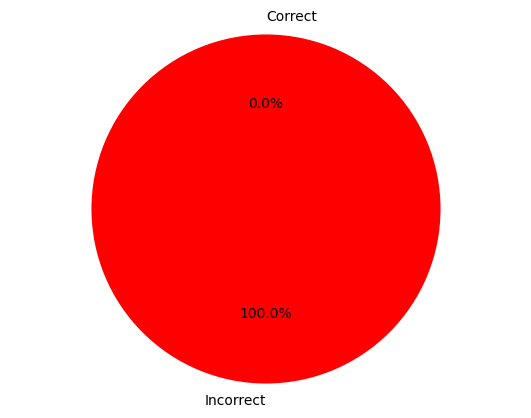

In [123]:
# Global Variables
computer_attacking_label = widgets.HTML(value='<p style="color: red; font-weight: bold; font-size: 20px;"></p>')
correct_answers = 0
incorrect_answers = 0
# Start the game
display_main_menu()